In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

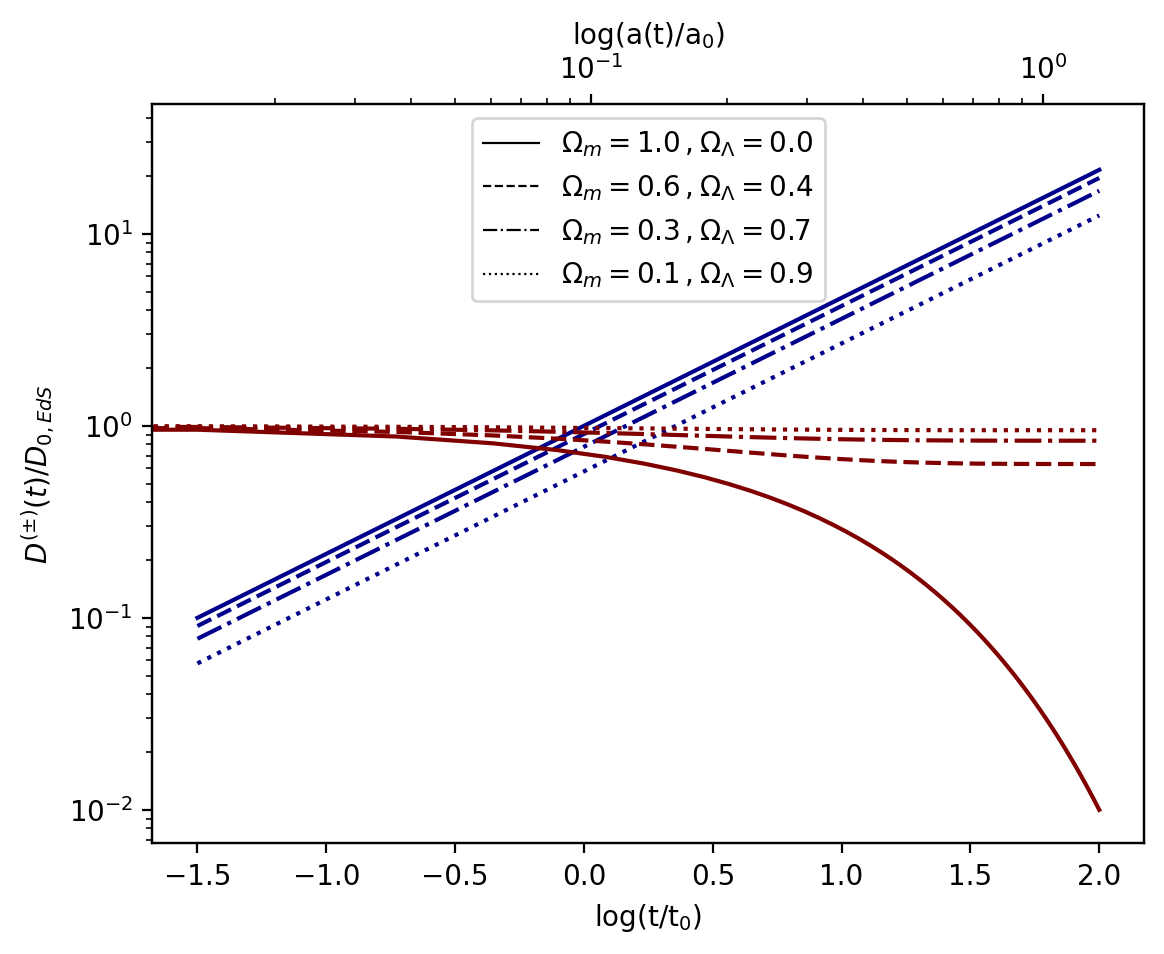

In [2]:
def t_to_a(t): 
    return t**(2/3) # for matter dominated universe

def funD_plus_Om(a, Om0):
    Ol0 = 1-Om0
    Numerator = 5/2*a*Om0
    denominator = Om0**(4/7)-Ol0+(1+Om0/2)*(1+Ol0/70)
    return Numerator/denominator

def funD_minus_Om(a, Om0):
    Ol0 = 1-Om0
    Numerator = np.sqrt(Om0*a**(-3)+Ol0)*a
    denominator = a
    return Numerator/denominator

c1 = 'darkblue'
c2 = 'maroon'
lss = ['-', '--', '-.', ':']
leg = []

t = np.logspace(-1.5, 2.0, 100)
a = t_to_a(t)

# Initialize the plot
fig, ax1 = plt.subplots()

for i, om in enumerate([1.0, 0.6, 0.3, 0.1]):
    leg.append(mlines.Line2D([], [], color='black', ls=lss[i], lw=0.8, label = r'$\Omega_m = {} \, , \Omega_\Lambda={} $' .format(om,1-om)))
    ax1.plot(np.log10(t), funD_plus_Om(a, om), color= c1, ls = lss[i])  
    
ax1.set_xlabel(r'$\rm{log} (t/t_0)$')
ax1.set_ylabel(r'$D^{(\pm)}(t)/D_{0, EdS}$')
# ax1.set_ylim([-0.5,20])

ax2 = ax1.twiny()
for i, om in enumerate([1.0, 0.6, 0.3, 0.1]):
    ax2.loglog(np.log10(a), funD_minus_Om(a, om), label = r'$\Omega_m = {} \, , \Omega_\Lambda={} $' .format(om,1-om), color= c2, ls = lss[i])  
ax2.set_xlabel(r'$\rm{log}(a(t)/a_0)$')

# ax1.grid(True)
# ax1.axhline(y=1.0, color='black', ls='--', lw=1, alpha=0.6)
# ax1.axvline(x=0.0, color='black', ls='--', lw=1, alpha=0.6)

# etc etc
plt.legend(handles=leg, loc='upper center')
# ax1.legend(color = 'black', loc = 'upper center')

plt.show()


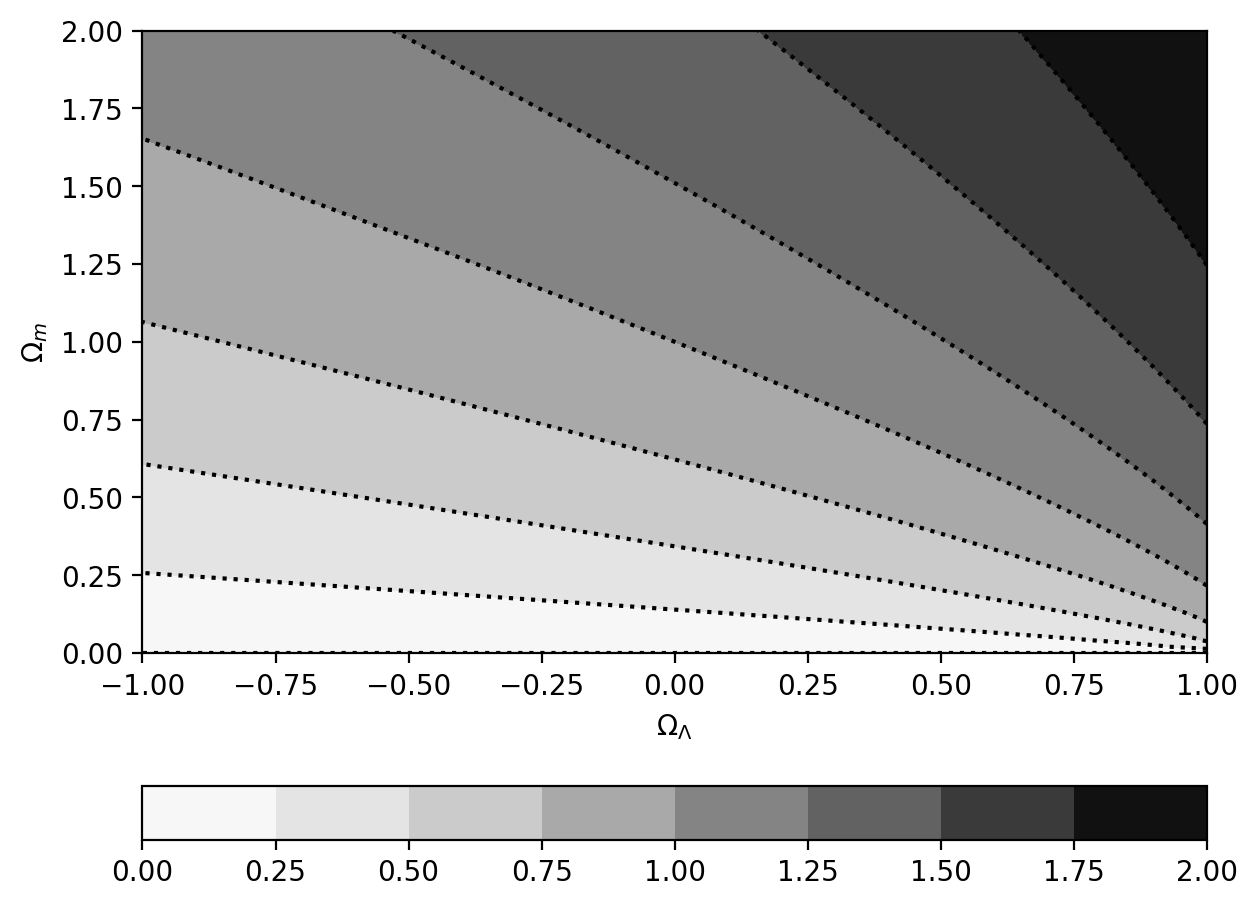

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to create contour levels (Example function)
def growth_factor(Omega_m, Omega_lambda):
    # Placeholder for the actual growth factor formula
    Numerator = 5/2*Omega_m
    denominator = Omega_m**(4/7)-Omega_lambda+(1+Omega_m/2)*(1+Omega_lambda/70)
    return Numerator/denominator

def plot_g_factor():
    omega_m = np.linspace(0, 2, 100)
    Omega_lambda = np.linspace(-1, 1, 100)
    Omega_m, Omega_lambda = np.meshgrid(omega_m, Omega_lambda)
    Z = growth_factor(Omega_m, Omega_lambda)

    cp1 = plt.contourf(Omega_lambda, Omega_m, Z, cmap='Greys')
    plt.contour(Omega_lambda, Omega_m, Z, colors='black', linestyles=':')
    fig.colorbar(cp1, orientation='horizontal')

plot_g_factor()
# plot_g_limit()
# plt.plot(omega_lambda, 4 * omega_lambda, 'k--', label='example line 2')
# plt.plot([0, 0], [0, 3], 'k-', label='example vertical line')
# plt.plot([-1, 2], [1, 1], 'k-', label='example horizontal line')

plt.xlabel(r'$\Omega_\Lambda$')
plt.ylabel(r'$\Omega_m$')

plt.tight_layout()
plt.show()